In [1]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse, resize
from skimage.draw import ellipse_perimeter
from skimage.io import imread
from source import rgb2gray

### Loading image

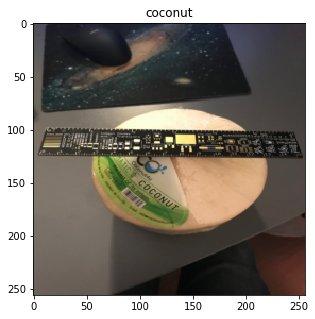

In [27]:
# choose from 5,7
n=5
Image=imread('images/%0.1d.jpeg'%n)
Image=resize(Image,(256,256))

# converting to rgb
plt.figure(figsize=(5,5))
plt.imshow(Image)
plt.title('coconut')
plt.show()
Image=rgb2gray(Image)

### Edge Detection

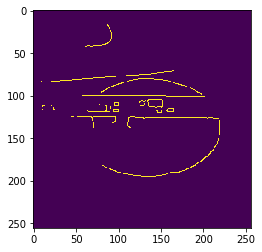

In [28]:
edges = canny(Image, sigma=2.0,
              low_threshold=0.3, high_threshold=0.5)
plt.imshow(edges)

### Circular Hough Transform

In [29]:
result = hough_ellipse(edges, accuracy=20, threshold=100,
                       min_size=50, max_size=100)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]



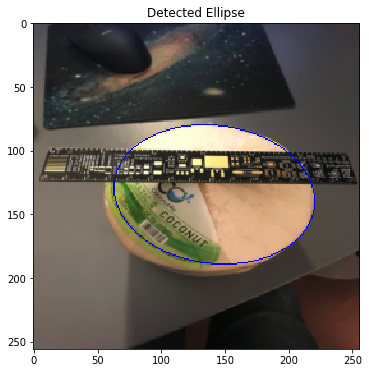

In [30]:
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb=imread('images/5.jpeg')
image_rgb=resize(image_rgb,(256,256))

image_rgb=image_rgb/image_rgb.max()
image_rgb[cy, cx] = (0, 0 ,1)

plt.figure(figsize=(6,6))
plt.title('Detected Ellipse')
plt.imshow(image_rgb)
plt.savefig('results/%0.1dr.jpg'%n)
plt.show()

### Diameter calculation in terms of pixels

In [31]:
print("*** Diameter of coconut is %0.2f pixels ***"%abs((a*2)))

*** Diameter of coconut is 156.00 pixels ***


### Confirming diameter in pixels

In [26]:
%matplotlib qt
plt.figure()
plt.imshow(Image)
print("Select 2 points")
pts=plt.ginput(n=2,timeout=0)
plt.show()
print("*** Original Diameter %0.2f pixels "%abs(pts[0][0]-pts[1][0]))
%matplotlib inline

Select 2 points
*** Original Diameter 171.08 pixels 
